In [2]:
using PyPlot, Revise, Korg

# read solar atlas

In [3]:
using DelimitedFiles

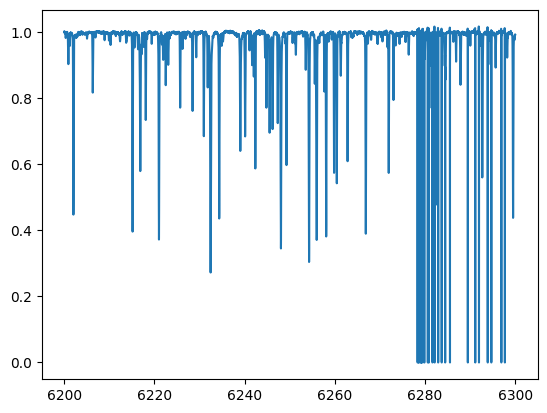

In [68]:
hinkel = readdlm("hinkel-solar-atlas.txt"; skipstart=17)

vacwls = Korg.air_to_vacuum.(hinkel[:, 2])
wlmask = 6200 .<= vacwls .<= 6300
solar_wls = reverse(vacwls[wlmask])

solar_rect_flux = reverse(hinkel[wlmask, 3])

# the Hinkle atlas does not provide measurement error, assume homoschedasticity
solar_err = ones(length(solar_wls)) 

plot(solar_wls, solar_rect_flux);

In [63]:
gray_lines = Korg.air_to_vacuum.([6223.987, 6224.506, 6226.736, 6230.091, 6233.199, 6238.386, 6245.219, 6247.560, 6253.831, 6266.321])

10-element Vector{Float64}:
 6225.708965950388
 6226.228105246653
 6228.458703768782
 6231.814604249563
 6234.92343845022
 6240.11183069467
 6246.946664801913
 6249.288293186354
 6255.560976522425
 6268.054329404008

In [95]:
windows = [(6200, 6230)]

1-element Vector{Tuple{Int64, Int64}}:
 (6200, 6230)

In [96]:
linelist = Korg.get_VALD_solar_linelist()
fitting_result = find_best_fit_params(solar_wls, solar_rect_flux, solar_err, linelist, 
                                      (Teff=5500.0, logg=4.4, vmic=1, m_H=-0.1); R=432000, windows=windows)
;

Constructing LSF matrix 100%|████████████████████████████| Time: 0:00:00


lb, ub: 1, 7767
ll, ul: 6200, 6230
λ1, λ2: 6200.001168487214, 6229.99801680695


In [97]:
fitting_result.trace

23-element Vector{NamedTuple{(:Teff, :logg, :vmic, :m_H, :chi2), NTuple{5, Float64}}}:
 (Teff = 5500.0, logg = 4.4, vmic = 0.9999999999999989, m_H = -0.10000000000000009, chi2 = 13.882791743077926)
 (Teff = 5499.999473268011, logg = 4.4415547392737045, vmic = 1.00668010473173, m_H = -0.9454243994434419, chi2 = 10.022419657698727)
 (Teff = 5105.94652210212, logg = 4.456798635241735, vmic = 1.0140539816741512, m_H = -1.0577071316995132, chi2 = 7.164043112956505)
 (Teff = 4945.006878486112, logg = 4.621064961462556, vmic = 1.4737807221257337, m_H = -1.023632692320974, chi2 = 5.822588060918355)
 (Teff = 5036.5161322526565, logg = 4.6855264292592596, vmic = 1.7879101183669552, m_H = -0.9353312991541625, chi2 = 5.360310413373437)
 (Teff = 5459.662770489738, logg = 4.839040849750063, vmic = 1.8382305950359255, m_H = -0.5785418404178935, chi2 = 4.3801533235811725)
 (Teff = 5636.030204791523, logg = 4.9141180777775695, vmic = 1.9090694946020845, m_H = -0.4210828900166619, chi2 = 4.2812423608447

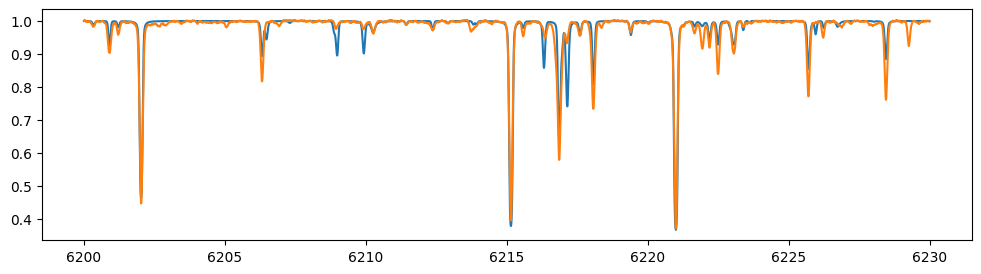

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x63d87c580>

In [98]:
figure(figsize=(12, 3))
plot(solar_wls[fitting_result.obs_wl_mask], fitting_result.best_fit_flux)
plot(solar_wls[fitting_result.obs_wl_mask], solar_rect_flux[fitting_result.obs_wl_mask])
